# Chapter 3: Exercise 9

**Import packages**

In [230]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ISLP.models import (ModelSpec as MS, summarize)

**Load Auto data set**

In [2]:
os.chdir('C:/Users/carma/Documents/Python Projects/islp')
Auto = pd.read_csv('Auto.csv', na_values=['?'])

**Remove rows with missing values**

In [3]:
Auto = Auto.dropna().reset_index().drop(columns='index')

### (a) Scatterplot matrix of Auto data set

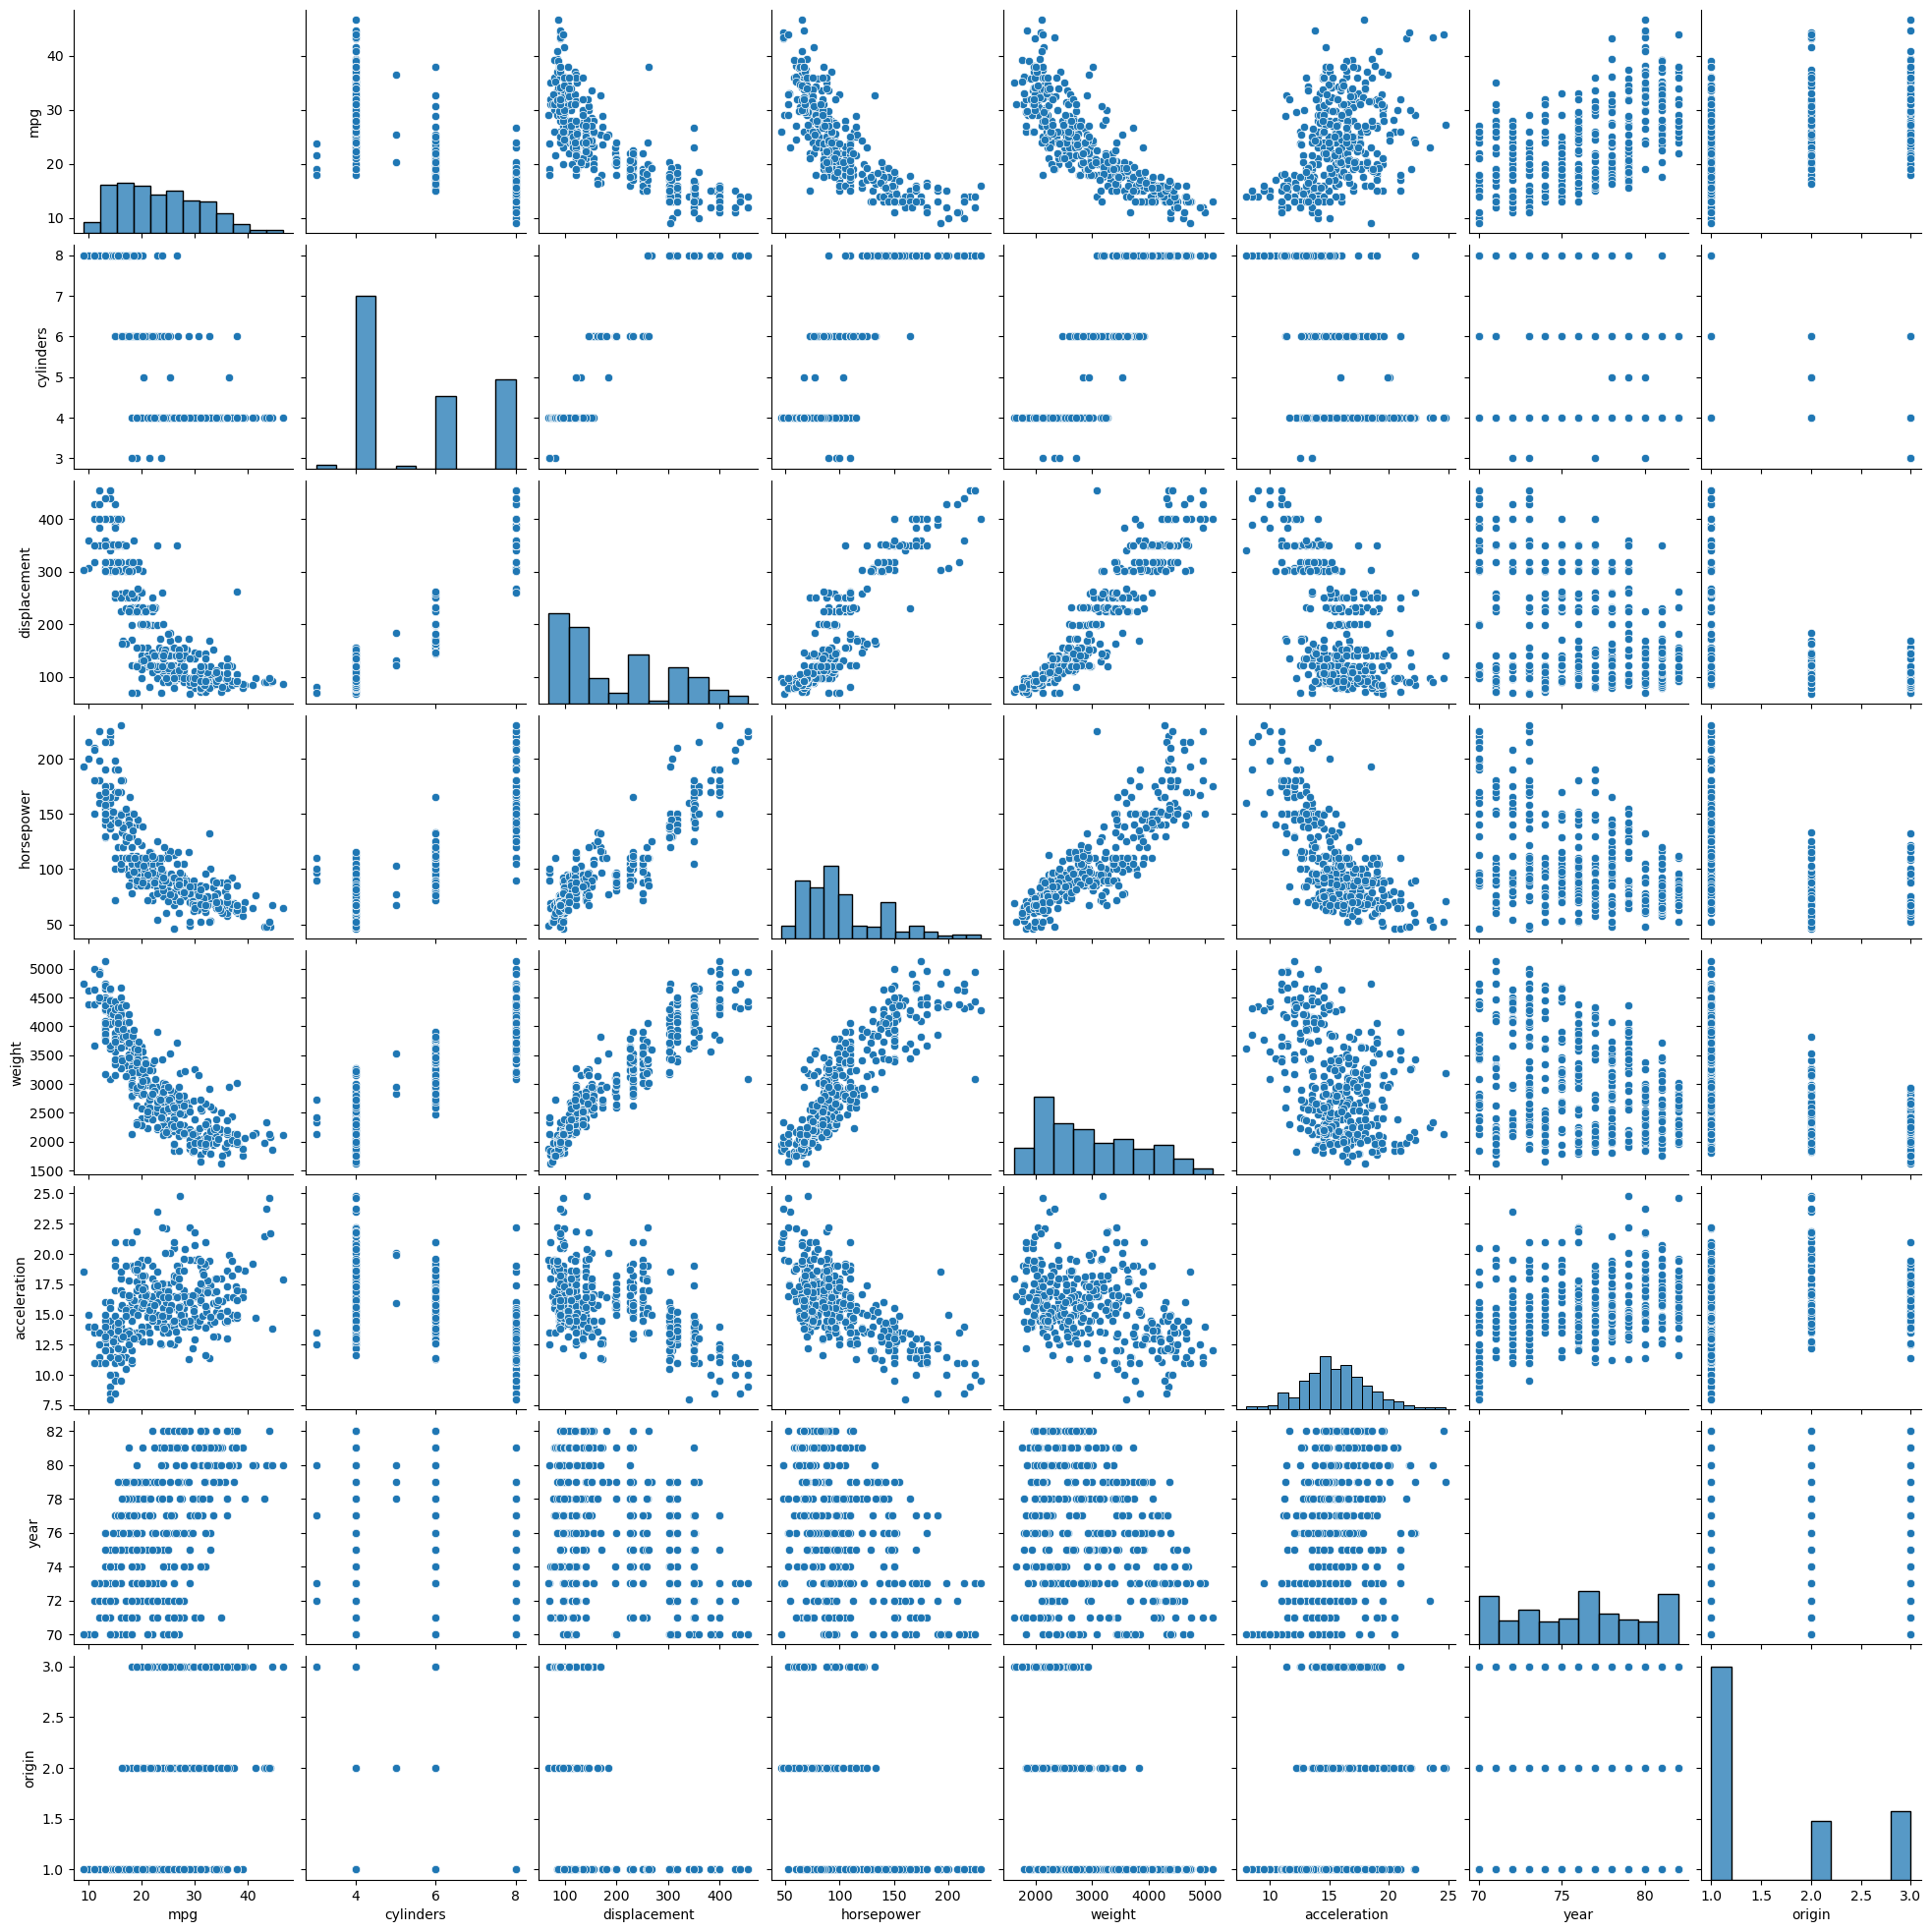

In [4]:
sns.pairplot(Auto)

### (b) Matrix of correlations between variables

In [5]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (c) Multiple linear regression with 'mpg' as response

In [6]:
design = MS(Auto.columns.drop(['mpg', 'name']))
X = design.fit_transform(Auto)
y = Auto['mpg']

In [7]:
model = sm.OLS(y, X)
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          2.04e-139
Time:                        15:18:36   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### i. Is there a relationship between the predictors and the response?

In [9]:
design = MS()
X = design.fit_transform(Auto)
y = Auto['mpg']

In [10]:
results1 = sm.OLS(y, X).fit()

In [11]:
sm.stats.anova_lm(results1, results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993469,0.0,NaN,NaN,NaN
1,384.0,4252.212530,7.0,19566.780939,252.428045,2.037106e-139


Yes, there is a relationship between the predictors and the response. Here we compare two linear models, "results1" which contains no predictors, and "results" which contains all predictors except "name". The null hypothesis is that the predictors are not needed, and the alternative hypothesis is that the bigger model with all predictors is superior. Here the F-statistic is 252.43 and the associated p-value is close to zero. This provides clear evidence that the precense of the predictors improves the linear model. 

#### ii. Statistically significant predictors

In [12]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


Displacement, weight, year, and origin all appear to have a statistically significant relationship to the response "mpg". This is indicated by their small p-values.

#### iii. Coefficient for the "year" variable

The coefficient for the "year" variable suggests that each year, on average cars "mpg" increases by $0.7508$.

### (d) Diagnostic plots of the linear regression fit

**Residual Plot**

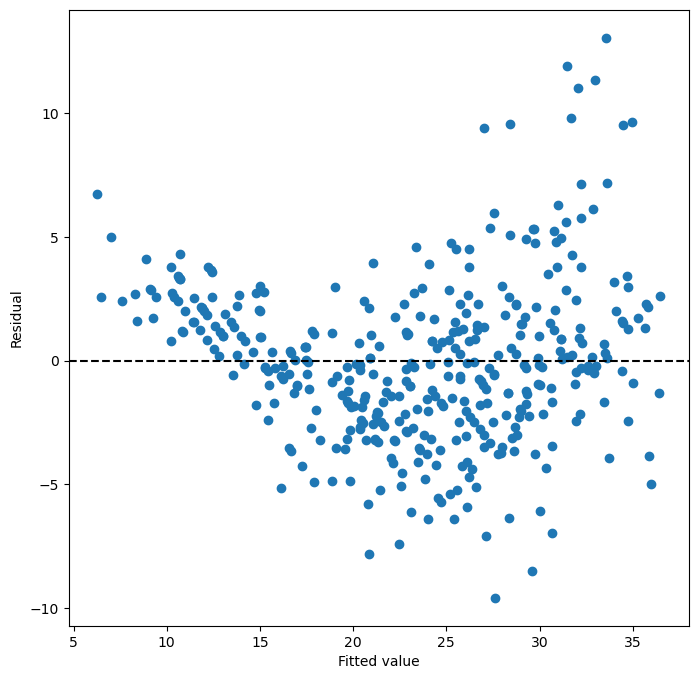

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.axhline(0, c='k', ls='--')
plt.show()

The U shaped pattern that we see in the residual plot suggests that there may be non linearity in the data. Looking at the pairplot above we see that many of the predictors of mpg exhibit a non linear relationship with mpg.

In [14]:
enum = [x for x in enumerate(results.resid)]

In [15]:
dtype = [('index', int), ('resid', float)]
a = np.array(enum, dtype=dtype)       # create a structured array
np.sort(a, order='resid')[-9:]

array([(325,  9.3945436 ), (388,  9.53542819), (381,  9.56683264),
       (327,  9.64196097), (307,  9.81224277), (242, 11.02103263),
       (323, 11.35077645), (324, 11.90813562), (320, 13.06042725)],
      dtype=[('index', '<i4'), ('resid', '<f8')])

These nine observations may be considered outliers on the basis of high residuals clustered as seen in the scatter plot.

**Looking for high leverage points**

13

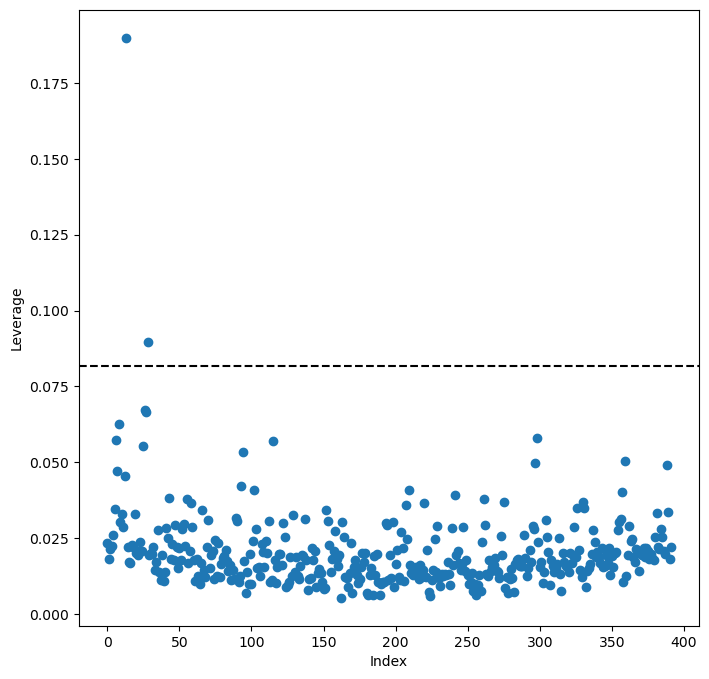

In [16]:
infl = results.get_influence()
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.axhline(np.average(infl.hat_matrix_diag)*4, c='k', ls='--')
np.argmax(infl.hat_matrix_diag)

In [17]:
np.average(infl.hat_matrix_diag)*4

0.08163265306122457

In [18]:
enum = [x for x in enumerate(infl.hat_matrix_diag)]

In [19]:
dtype = [('index', int), ('leverage', float)]
a = np.array(enum, dtype=dtype)       # create a structured array
np.sort(a, order='leverage')[-2:]

array([(28, 0.08954137), (13, 0.18991289)],
      dtype=[('index', '<i4'), ('leverage', '<f8')])

Observations 28 and 13 have leverage greater than four times the average leverage. We conclude on this basis that they have unusually high leverage.

**Computing studentized residuals**

In [20]:
stu_res = results.get_influence().get_resid_studentized_external()

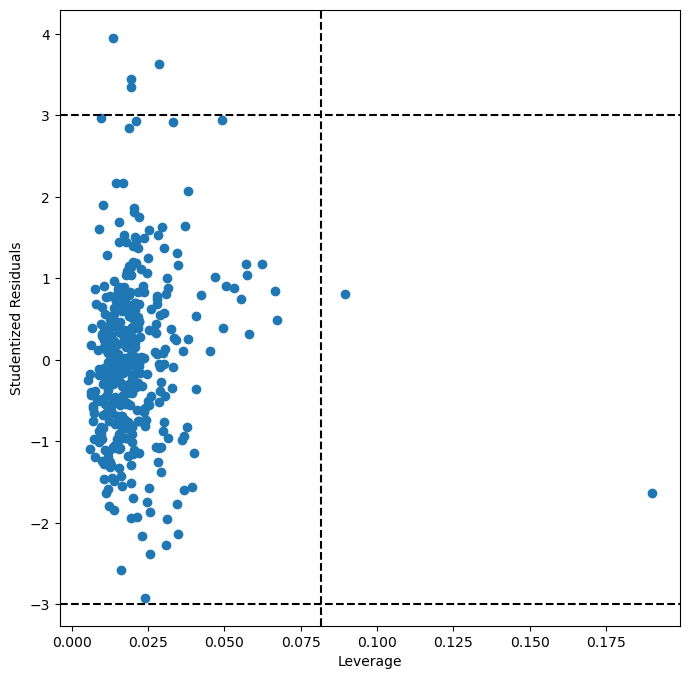

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(infl.hat_matrix_diag, stu_res)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.axhline(-3, c='k', ls='--')
plt.axhline(3, c='k', ls='--')
plt.axvline(np.average(infl.hat_matrix_diag)*4, c='k', ls='--')

In [22]:
enum = [x for x in enumerate(stu_res)]

In [23]:
dtype = [('index', int), ('stu_res', float)]
a = np.array(enum, dtype=dtype)
np.sort(a, order='stu_res')[-4:]

array([(242, 3.34468063), (323, 3.44488536), (324, 3.6310711 ),
       (320, 3.9518941 )], dtype=[('index', '<i4'), ('stu_res', '<f8')])

Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. Note these four possible outliers also appear in our residual plot above as possible outliers. We again take note of the two high leverage points shown. There are no points that are both outlier and high leverage. Sorting the dataset we see that these four points are indeed unusual from the bulk of the dataset and may be removed in further analysis.

### (e) Adding interaction terms to the model

**Original model**

In [24]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


**Adding an interaction term between weight and acceleration**

In [45]:
var = Auto.columns.drop(['mpg', 'name']).to_list()
var.extend([('weight', 'acceleration')])

In [46]:
design = MS(var)
X = design.fit_transform(Auto)
y = Auto['mpg']

In [47]:
results2 = sm.OLS(y, X).fit()

In [48]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,-43.6409,5.811000,-7.511,0.000
cylinders,-0.2141,0.308000,-0.696,0.487
displacement,0.0031,0.007000,0.419,0.676
horsepower,-0.0414,0.013000,-3.071,0.002
weight,0.0040,0.002000,2.462,0.014
acceleration,1.6292,0.242000,6.726,0.000
year,0.7821,0.048000,16.184,0.000
origin,1.0329,0.269000,3.846,0.000
weight:acceleration,-0.0006,0.000084,-6.928,0.000


In [49]:
sm.stats.anova_lm(results, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3778.654965,1.0,473.557565,47.999235,1.813073e-11


Adding the interaction term between weight and acceleration appears to improve the linear model as indicated by the large F statistic, and thus the small associated p-value. We also see in the precense of the other predictors, this interaction term is statistically significant.

**Adding an interaction term between weight and acceleration as well as cylinders and displacement**

In [55]:
var = Auto.columns.drop(['mpg', 'name']).to_list()
var.extend([('weight', 'acceleration'), ('cylinders', 'displacement')])

In [56]:
design = MS(var)
X = design.fit_transform(Auto)
y = Auto['mpg']

In [57]:
results3 = sm.OLS(y, X).fit()

In [58]:
summarize(results3)

,coef,std err,t,P>|t|
intercept,-21.1799,7.263000,-2.916,0.004
cylinders,-1.9514,0.463000,-4.214,0.000
displacement,-0.0606,0.015000,-4.073,0.000
horsepower,-0.0529,0.013000,-3.976,0.000
weight,0.0002,0.002000,0.129,0.897
acceleration,0.9199,0.276000,3.333,0.001
year,0.7744,0.047000,16.492,0.000
origin,0.6842,0.270000,2.531,0.012
weight:acceleration,-0.0003,0.000097,-3.299,0.001
cylinders:displacement,0.0100,0.002000,4.912,0.000


In [59]:
sm.stats.anova_lm(results, results2, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3778.654965,1.0,473.557565,50.897730,4.899742e-12
2,382.0,3554.166180,1.0,224.488785,24.127942,1.339146e-06


Adding the interaction term between cylinders and displacement to the model with the interaction term between weight and acceleration appears to improve the linear model as indicated by the large F statistic, and thus small p-value. Also in this model we see the new interaction term is statistically significant.

**Adding an interaction term between cylinders and displacement, weight and horsepower, weight and acceleration**

In [35]:
var = Auto.columns.drop(['mpg', 'name']).to_list()
var.extend([('weight', 'acceleration'),('cylinders', 'displacement'), ('weight', 'horsepower')])

In [36]:
design = MS(var)
X = design.fit_transform(Auto)
y = Auto['mpg']

In [37]:
results4 = sm.OLS(y, X).fit()

In [38]:
summarize(results4)

,coef,std err,t,P>|t|
intercept,-0.152300,7.830000,-0.019,0.984
cylinders,-0.666600,0.495000,-1.347,0.179
displacement,-0.019100,0.016000,-1.201,0.231
horsepower,-0.201900,0.028000,-7.111,0.000
weight,-0.008800,0.002000,-3.840,0.000
acceleration,0.116900,0.298000,0.393,0.695
year,0.771900,0.045000,17.144,0.000
origin,0.710400,0.259000,2.740,0.006
weight:acceleration,-0.000068,0.000000,-0.660,0.510
cylinders:displacement,0.003600,0.002000,1.616,0.107


In [39]:
sm.stats.anova_lm(results, results2, results3, results4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3778.654965,1.0,473.557565,55.362563,6.657963e-13
2,382.0,3554.166180,1.0,224.488785,26.244485,4.783488e-07
3,381.0,3258.979060,1.0,295.187120,34.509670,9.253079e-09


Adding the interaction term between weight and horsepower to the model with interaction terms cylinders and displacement, weight and acceleration appears to improve the linear model as indicated by the large F statistic, and thus small associated p-value. 

We note the reduction in ssr as well between each subsequent model we are performing an F test against.

Also we see the new interaction term is statistically significant. Oddly though the precense of this extra interaction term reduces the individual statistical significance between some of the other predictors and mpg. This might suggest that we can drop some predcitors from our model and achieve a better resulting model. To be tested...

### (f) Transformations of variables e.g. $\log(X), \sqrt{X}, X^2$

In [218]:
var = Auto.columns.drop(['mpg', 'name']).to_list()
var.extend([('weight', 'acceleration'),('cylinders', 'displacement'), ('weight', 'horsepower')])

In [219]:
design = MS(var)
X = design.fit_transform(Auto)
y = Auto['mpg']

In [220]:
# X['displacement'] = np.sqrt(X['displacement'])
X['displacement'] = X['displacement']**2
# X['displacement'] = np.log(X['displacement'])

# X['horsepower'] = np.sqrt(X['horsepower'])
# X['horsepower'] = X['horsepower']**2
X['horsepower'] = np.log(X['horsepower'])

# X['weight'] = np.sqrt(X['weight'])
# X['weight'] = X['weight']**2
X['weight'] = np.log(X['weight'])

# X['acceleration'] = np.sqrt(X['acceleration'])
# X['acceleration'] = X['acceleration']**2
X['acceleration'] = np.log(X['acceleration'])

# X['cylinders'] = np.sqrt(X['cylinders'])
# X['cylinders'] = X['cylinders']**2
X['cylinders'] = np.log(X['cylinders'])

In [221]:
model = sm.OLS(y, X)
results5 = model.fit()

In [222]:
summarize(results5)

,coef,std err,t,P>|t|
intercept,176.295800,38.838000,4.539,0.000
cylinders,0.486500,2.800000,0.174,0.862
displacement,0.000024,0.000030,0.794,0.428
horsepower,-12.028400,1.853000,-6.492,0.000
weight,-18.853800,4.337000,-4.347,0.000
acceleration,-5.090500,4.220000,-1.206,0.229
year,0.770500,0.045000,17.187,0.000
origin,0.726900,0.242000,3.007,0.003
weight:acceleration,0.000030,0.000087,0.341,0.733
cylinders:displacement,-0.001400,0.002000,-0.633,0.527


In [229]:
sm.stats.anova_lm(results, results2, results3, results4, results5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3778.654965,1.0,473.557565,56.246947,4.496058e-13
2,382.0,3554.166180,1.0,224.488785,26.663725,3.904865e-07
3,381.0,3258.979060,1.0,295.187120,35.060942,7.138618e-09
4,381.0,3207.737368,-0.0,51.241691,-inf,NaN


By squaring displacement and taking the base e logarithm of horsepower, weight, acceleration, and cylinders we seem to get a better fit with smaller ssr.